In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Connect to google drive

target_folder = "207 Machine Learning: Final Project"
found_path = None

for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if target_folder in dirs:
        found_path = os.path.join(root, target_folder)
        break

if found_path:
    os.chdir(found_path)
    print("Changed working directory to:", os.getcwd())
else:
    print(f"Folder '{target_folder}' not found.")

Changed working directory to: /content/drive/.shortcut-targets-by-id/1MnqFmQYij3NcmwhbYUVc-9h4Dp6eLuMH/207 Machine Learning: Final Project


In [2]:
def view_missing_values(df):
    row_count, col_count = df.shape
    summary = pd.DataFrame({
        'Missing Value Count': df.isnull().sum(),
        'Proportion of Missing Values': df.isnull().sum() / row_count,
        'Data Type': df.dtypes
    })
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(summary)
        print("Shape of the data frame", df.shape)

## <span style="color:chocolate">1. Data Preprocessing</span>

### 1.1 Rename Columns



In [37]:
# Read in the data
data_dir = "./Data (1)"
centroids_data = pd.read_csv(os.path.join(data_dir, "regional_combined_centroids.csv"))

RANDOM_CODE = 1234

# Rename the columns
with open(os.path.join(data_dir, "rename.json"), 'r') as f:
    rename = json.load(f)

rename_dict = {}
for col in centroids_data.columns:
    if col in rename.keys():
         rename_dict[col] = rename[col]['simplifiedName']

centroids_data.rename(columns=rename_dict, inplace=True)

### 1.2 Drop Columns

In [38]:
centroids_data_columns = centroids_data.columns.tolist()

# Define a function to classify tracts as food deserts
def is_food_desert(row):
    return 1 if (row["LILA_Urban1_Rural10"] == 1) else 0

# Create a new column in the DataFrame to indicate food deserts
centroids_data["IsFoodDesert"] = centroids_data.apply(is_food_desert, axis=1)

# Drop columns that are not needed, remove columns similar to definition of "Ys" labels
#Drop TractID, StateName, CountyName


# Feature Selection
features = [
    # "TractID",
    # "StateName",
    # "CountyName",
    "IsUrban",
    "Pop2010",
    "OccupiedHousingUnits",
    "HighGroupQuarters",
    "GroupQuartersPopulation",
    "GroupQuartersShare",
    # "LILA_Urban1_Rural10",
    # "LILA_UrbanHalf_Rural10",
    # "LILA_Urban1_Rural20",
    # "LILA_VehicleOr20Miles",
    "LowVehicleAccess",
    "IsLowIncome",
    "PovertyRate",
    # "MedianIncome",
    # "LA_Urban1_Rural10",
    # "LA_UrbanHalf_Rural10",
    # "LA_Urban1_Rural20",
    # "LA_HalfMile",
    # "LA_1Mile",
    # "LA_10Miles",
    # "LA_20Miles",
    # "LA_VehicleOr20Miles", # population number, haven't tried
    # "LAPop_Urban1_Rural10",
    # "LAPop_UrbanHalf_Rural10",
    # "LAPop_Urban1_Rural20",
    # "LALowIncome_Urban1_Rural10", # population number, but have too many missing values
    # "LALowIncome_UrbanHalf_Rural10",
    # "LALowIncome_Urban1_Rural20",
    # "LAPop_HalfMile",
    # "LAPopShare_HalfMile",
    # "LALowIncome_HalfMile",
    # "LALowIncomeShare_HalfMile",
    # "LAKids_HalfMile",
    # "LAKidsShare_HalfMile",
    # "LASeniors_HalfMile",
    # "LASeniorsShare_HalfMile",
    # "LAWhite_HalfMile",
    # "LAWhiteShare_HalfMile",
    # "LABlack_HalfMile",
    # "LABlackShare_HalfMile",
    # "LAAsian_HalfMile",
    # "LAAsianShare_HalfMile",
    # "LANHPI_HalfMile",
    # "LANHPIShare_HalfMile",
    # "LAAIAN_HalfMile",
    # "LAAIANShare_HalfMile",
    # "LAMultiracial_HalfMile",
    # "LAMultiracialShare_HalfMile",
    # "LAHispanic_HalfMile",
    # "LAHispanicShare_HalfMile",
    # "LANoVehicle_HalfMile",
    # "LANoVehicleShare_HalfMile",
    # "LASNAP_HalfMile",
    # "LASNAPShare_HalfMile",
    # "LAPop_1Mile",
    # "LAPopShare_1Mile",
    # "LALowIncome_1Mile",
    # "LALowIncomeShare_1Mile",
    # "LAKids_1Mile",
    # "LAKidsShare_1Mile",
    # "LASeniors_1Mile",
    # "LASeniorsShare_1Mile",
    # "LAWhite_1Mile",
    # "LAWhiteShare_1Mile",
    # "LABlack_1Mile",
    # "LABlackShare_1Mile",
    # "LAAsian_1Mile",
    # "LAAsianShare_1Mile",
    # "LANHPI_1Mile",
    # "LANHPIShare_1Mile",
    # "LAAIAN_1Mile",
    # "LAAIANShare_1Mile",
    # "LAMultiracial_1Mile",
    # "LAMultiracialShare_1Mile",
    # "LAHispanic_1Mile",
    # "LAHispanicShare_1Mile",
    # "LANoVehicle_1Mile",
    # "LANoVehicleShare_1Mile",
    # "LASNAP_1Mile",
    # "LASNAPShare_1Mile",
    # "LAPop_10Miles", # population number, but have too many missing values
    # "LAPopShare_10Miles",
    # "LALowIncome_10Miles",
    # "LALowIncomeShare_10Miles",
    # "LAKids_10Miles",
    # "LAKidsShare_10Miles",
    # "LASeniors_10Miles",
    # "LASeniorsShare_10Miles",
    # "LAWhite_10Miles",
    # "LAWhiteShare_10Miles",
    # "LABlack_10Miles",
    # "LABlackShare_10Miles",
    # "LAAsian_10Miles",
    # "LAAsianShare_10Miles",
    # "LANHPI_10Miles",
    # "LANHPIShare_10Miles",
    # "LAAIAN_10Miles",
    # "LAAIANShare_10Miles",
    # "LAMultiracial_10Miles",
    # "LAMultiracialShare_10Miles",
    # "LAHispanic_10Miles",
    # "LAHispanicShare_10Miles",
    # "LANoVehicle_10Miles",
    # "LANoVehicleShare_10Miles",
    # "LASNAP_10Miles",
    # "LASNAPShare_10Miles",
    # "LAPop_20Miles",
    # "LAPopShare_20Miles",
    # "LALowIncome_20Miles",
    # "LALowIncomeShare_20Miles",
    # "LAKids_20Miles",
    # "LAKidsShare_20Miles",
    # "LASeniors_20Miles",
    # "LASeniorsShare_20Miles",
    # "LAWhite_20Miles",
    # "LAWhiteShare_20Miles",
    # "LABlack_20Miles",
    # "LABlackShare_20Miles",
    # "LAAsian_20Miles",
    # "LAAsianShare_20Miles",
    # "LANHPI_20Miles",
    # "LANHPIShare_20Miles",
    # "LAAIAN_20Miles",
    # "LAAIANShare_20Miles",
    # "LAMultiracial_20Miles",
    # "LAMultiracialShare_20Miles",
    # "LAHispanic_20Miles",
    # "LAHispanicShare_20Miles",
    # "LANoVehicle_20Miles",
    # "LANoVehicleShare_20Miles",
    # "LASNAP_20Miles",
    # "LASNAPShare_20Miles",
    "LowIncomePopulation",
    "ChildPopulation",
    "SeniorPopulation",
    "WhitePopulation",
    "BlackPopulation",
    "AsianPopulation",
    "NHPIPopulation",
    "AIANPopulation",
    "MultiracialPopulation",
    "HispanicPopulation",
    "NoVehicleHouseholds",
    "SNAPRecipients",
    # "GEOID",
    # "latitude",
    # "longitude",
    # "ImagePath",
    "IsFoodDesert"
]

In [39]:
centroids_data=centroids_data[features]

view_missing_values(centroids_data)

,Missing Value Count,Proportion of Missing Values,Data Type
IsUrban,0,0.0,int64
Pop2010,0,0.0,int64
OccupiedHousingUnits,0,0.0,int64
HighGroupQuarters,0,0.0,int64
GroupQuartersPopulation,0,0.0,int64
GroupQuartersShare,0,0.0,float64
LowVehicleAccess,0,0.0,int64
IsLowIncome,0,0.0,int64
PovertyRate,0,0.0,float64
LowIncomePopulation,0,0.0,int64


Shape of the data frame (7121, 22)


In [40]:
centroids_data.dropna(inplace=True)
centroids_data.shape

(7121, 22)

### 1.3 Split Data

In [41]:
# Shuffle the data
shuffled_indices = np.random.RandomState(RANDOM_CODE).permutation(len(centroids_data[features]))
centroids_data = centroids_data.iloc[shuffled_indices].reset_index(drop=True)

# Split the data
y = centroids_data["IsFoodDesert"]
X = centroids_data[features].drop(columns=["IsFoodDesert"])
# X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size=0.2, random_state=1)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=1)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=RANDOM_CODE)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (5696, 21)
Test set shape: (1425, 21)


### 1.4 Random Forest Model

In [42]:
model = RandomForestClassifier(
    random_state=RANDOM_CODE,
    n_estimators=10,
    criterion='entropy',
    n_jobs=2,
    max_features=None,
    bootstrap=False,
    max_depth=8,
)

forest = model.fit(X_train,y_train)

train_forest = forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print ('Accuracy on training data:', round(train_forest.score(X_train, y_train),2))
# print ('Accuracy on validation data:', round(train_forest.score(X_val, y_val),2))
print ('Accuracy on test data:', round(train_forest.score(X_test, y_test),2))

# Confusion Matrix
print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

#print features
features_update = centroids_data[features].drop(columns=["IsFoodDesert"]).columns.tolist()
#print('Features:',features_update)
#print ('Feature importances:', forest.feature_importances_)

arr = np.array(forest.feature_importances_)
features_array = np.array(features_update)
top3_indices = np.argsort(forest.feature_importances_)[-3:][::-1]
print("Top 3 largest values:", np.round(arr[top3_indices], 2))
print("Top 3 important features:", features_array[top3_indices] )

Accuracy on training data: 0.89
Accuracy on test data: 0.84

🧮 Confusion Matrix:
[[1027  115]
 [ 108  175]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1142
           1       0.60      0.62      0.61       283

    accuracy                           0.84      1425
   macro avg       0.75      0.76      0.76      1425
weighted avg       0.84      0.84      0.84      1425

Top 3 largest values: [0.55 0.1  0.06]
Top 3 important features: ['IsLowIncome' 'IsUrban' 'LowVehicleAccess']


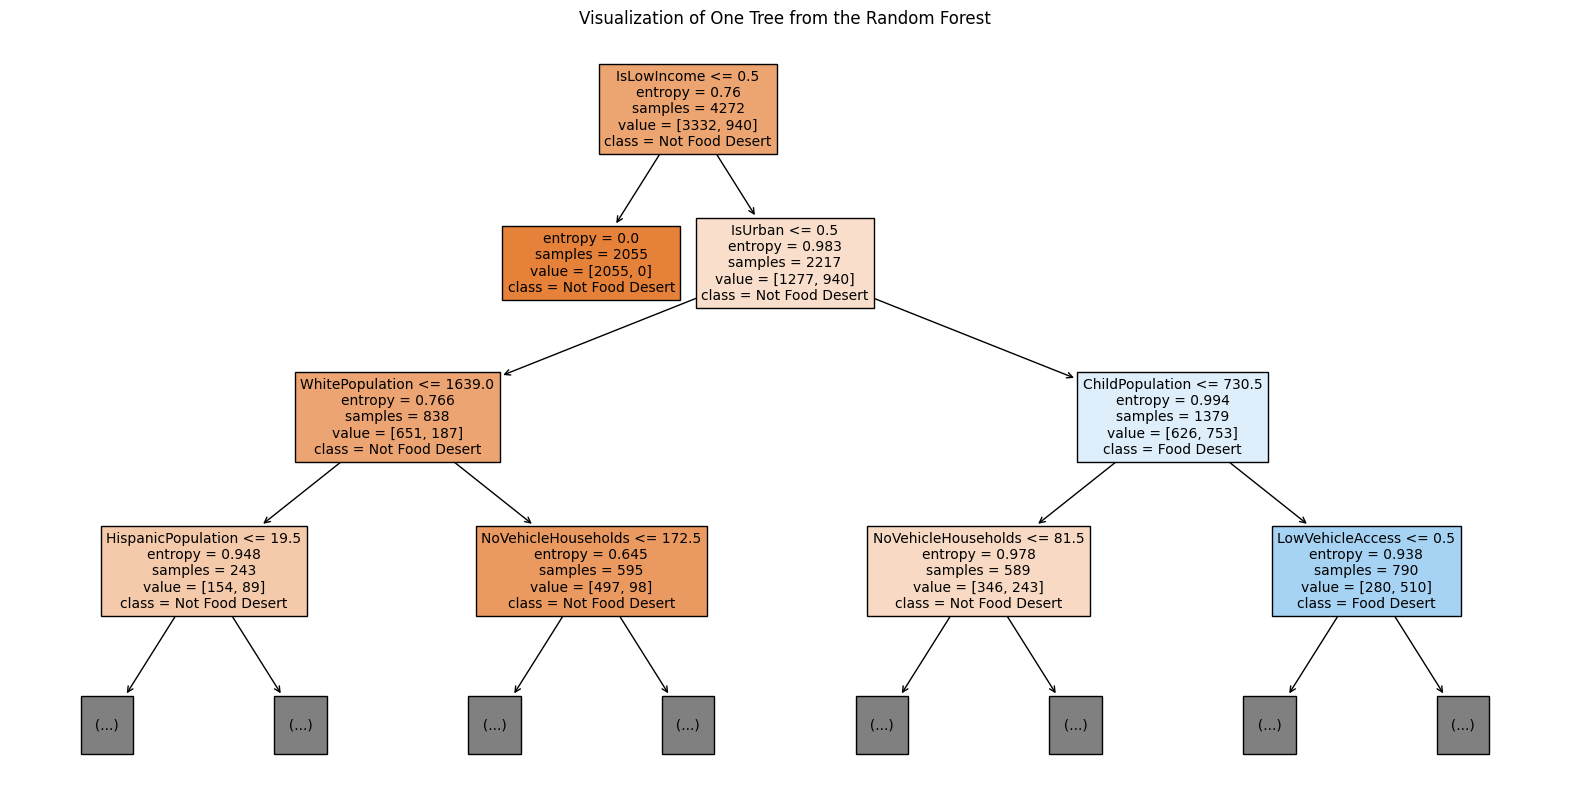

In [33]:
# Pick one tree from the forest
estimator = model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=features,
          class_names=['Not Food Desert', 'Food Desert'],
          filled=True,
          max_depth=3,     # Limit depth for readability
          fontsize=10)
plt.title("Visualization of One Tree from the Random Forest")

plt.show()

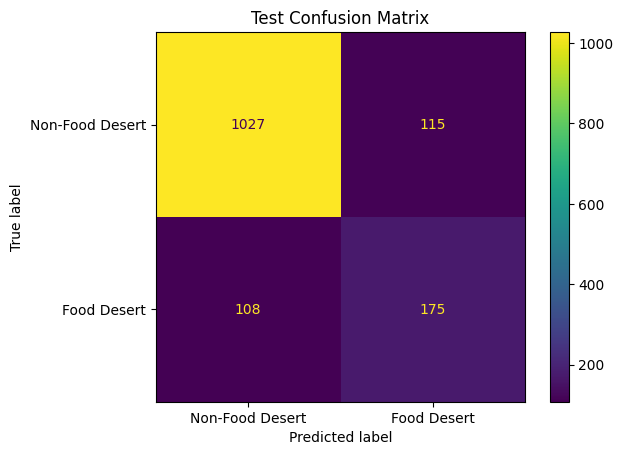

Training Data Results:
True Positives training (TP): 175
False Negatives training(FN): 108
False Positives traniing(FP): 115
True Negatives traniing(TN): 1027


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
table_validation= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Food Desert', 'Food Desert']) 
table_validation.plot()
table_validation.ax_.set_title('Test Confusion Matrix')
plt.show()

TN, FP, FN, TP = cm.ravel()
print("Training Data Results:")
print(f"True Positives training (TP): {TP}")
print(f"False Negatives training(FN): {FN}")
print(f"False Positives traniing(FP): {FP}")
print(f"True Negatives traniing(TN): {TN}")